### KMeans Clustering Algorithm

In [42]:
# Brief about K means clustering

- A Supervised ML technique/algorithm
- also called flat clustering algorithm
- Used to find clusters in a dataset based on centroid, so its a centroid based algorithm
- predefined number of clusters are formed using this algorithm
- that means we need to define the number of cluster before fitting our training data OR it's totally up to us how many cluster we want to discover

In [43]:
# So what is clustering??

A cluster is group of data points or objects in a dataset that are similar to other objects in the group, and dissimilar to data points.

In [1]:
# Steps Involved in Kmeans Algorithm

1. Select k no of clusters to be formed
2. Select same number of random centroid  for each cluster,centroids can be a point from the clusters or some different points
3. Assign each data point to the nearest centroid, based on distances from all the Centroids, it will form the predefined clusters.
           
           The distance between the centroid and data points is calculated using any one of distance metric, 
           mostly we choose Euclidean distance or Manhattan distance.
4. Calculate the variance and place a new centroid of each cluster & reassign data point based on closest distance
5. Repeat above steps untill every data point is assgined to some centroid with minimum distance, if no assignment occurs then model if ready, finished.

- In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum

In [2]:
# how to choose the right Number Of Clusters

- Each and Every cluster is formed by calculating and comparing the mean distances of each data points from its centroid.
- We Can Choose the right number of clusters with the help of the Within-Cluster-Sum-of-Squares (WCSS) method.
- WCSS Stands for the sum of the squares of distances of the data points in each and every cluster from its centroid.
- Distance is calculated using euclidean or Manhattan distance
- As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1
- The main idea is to minimize the distance between the data points and the centroid of the clusters. The process is iterated until we reach a minimum value for the sum of distances.

The method of finding the right number of cluster using **WCSS value** is called **Elbow Method** it because when the plot the values of K against WCSS value on y- axis, the graph looks like an elbow.

In [3]:
# Steps to find best value of clusters

1. Execute the K-means clustering on a given dataset for different K values (ranging from 1-10).
2. For each value of K, calculates the WCSS value.
3. Plots a graph/curve between WCSS values and the respective number of clusters K.
4. The sharp point of bend or a point( looking like an elbow joint ) of the plot like an arm, will be considered as the best/optimal value of K

In [45]:
### What is importance of choosing right no of clusters K?

The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms,  optimal number of clusters optimum performance.

In [46]:
# which methos is used in K-measns Clustering to find the right no of clusters K?

The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares.

    WCSS= ∑Pi distance(Pi C1)2 +∑Pi distance(Pi C2)2+∑Pi distance(Pi C3)2

### Python implementation of Kmeans Clustering

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import statsmodels.api as statsapi
from sklearn.cluster import KMeans

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=5)

In [38]:
# x[0]
# x[0,1]

In [26]:
from sklearn.cluster import KMeans

    kmeans=KMeans(n_clusters=8,init='k-means++',n_init=10,max_iter=300,tol=0.0001, precompute_distances='deprecated',                              verbose=0,random_state=None,copy_x=True,n_jobs='deprecated',algorithm='auto')

In [27]:
kmeans=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=0.0001, precompute_distances='deprecated',verbose=0,
    random_state=None,copy_x=True,n_jobs='deprecated',algorithm='auto')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


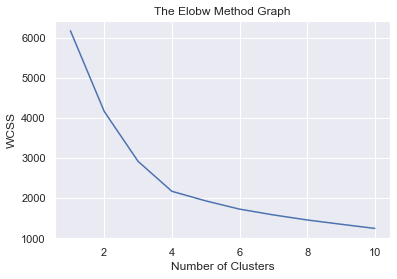

In [28]:
# Finding the best number of clusters
from sklearn.cluster import KMeans

wcss= []  #Initializing an empty list

# We will Our model 10 times using for loop, each time with different value of K in range(1,11)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**You can notice that our graph is making a bend (like an elbow) shape at position 4, so we can conclude that the best  number of cluster is 4**

In [41]:
# Model fitting

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)
ypred= kmeans.fit_predict(x)

In [40]:
#visulaizing the clusters

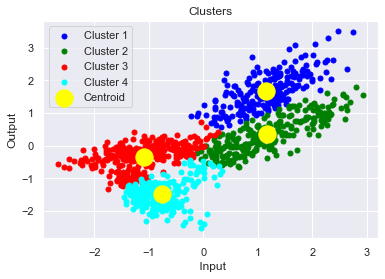

In [35]:
plt.scatter(x[ypred == 0, 0], x[ypred == 0, 1], s = 25, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[ypred == 1, 0], x[ypred == 1, 1], s = 25, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[ypred== 2, 0], x[ypred == 2, 1], s = 25, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[ypred == 3, 0], x[ypred == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid') 
plt.title('Clusters')
plt.xlabel(' Input')
plt.ylabel('Output')
plt.legend()
plt.show()

    In the above plot:
    x[ypred == 0, 0], selects all rows where ypred=0, and first column of x. similarly other.

In [ ]:
# Attributes

    kmeans.cluster_centers_
    kmeans.n_clusters : gives number of cluser i.e. 4 in this case
    kmeans.labels_ : gives an array of cluster's labels i.e. a array of size ypred consisting 0,1,2,3 repeatedly.

### Exmaple 2:

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [58]:
from sklearn.datasets import make_blobs

In [59]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=1)

In [60]:
X[0:2]

array([[-6.97989786, -9.66301042],
       [-8.00432507, -7.54493462]])

In [61]:
X.shape

(500, 2)

In [62]:
y[0:3]

array([2, 2, 1])

In [63]:
# visualize the dataset

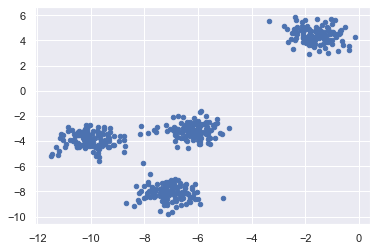

In [64]:
plt.scatter(X[:, 0], X[:, 1], s=20) # s is mark size
plt.show()

In [65]:
model = KMeans(n_clusters=4)
model.fit(X)
ypred = model.predict(X)

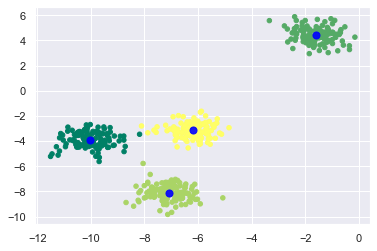

In [66]:
# visualizing the cluster’s centers picked by k-means Python estimator
plt.scatter(X[:, 0], X[:, 1], c=ypred, s=20, cmap='summer')
# s : float or array-like, shape (n, ), optional, The marker size in points**2.
# c : array-like or list of colors or color, optional, The marker colors. Possible values:
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=50, alpha=0.9);
plt.show()

### Example 3

In [67]:
# lets predict a digit from sklearn's digits data

we are going to apply K-means clustering on simple digits dataset. K-means will try to identify similar digits without using the original label information

In [70]:
# basic libraries already loaded 

In [69]:
# load the data
from sklearn.datasets import load_digits
digits=load_digits()

In [71]:
df=pd.DataFrame(digits.data)

In [72]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [74]:
# There is no need to prepcocess the data, as inbuilt data is already prepared for use

In [73]:
# model fitting
kmeans=KMeans(n_clusters=10, random_state=0)

Here we have chosen k=10, because there are 10 digits from 0 to 9.

In [75]:
clusters=kmeans.fit_predict(digits.data)

In [76]:
kmeans.cluster_centers_.shape

(10, 64)

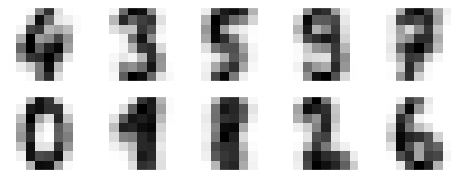

In [77]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [78]:
# The following lines of code will match the learned cluster labels with the true labels found in them −

In [79]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [81]:
## Advantages of KMeans Clustering:

It is very easy to understand and implement.

If we have large number of variables then, K-means would be faster than Hierarchical clustering.

On re-computation of centroids, an instance can change the cluster.

Tighter clusters are formed with K-means as compared to Hierarchical clustering.

In [82]:
# Disadvantages of K-Means clustering algorithms:

    It is a bit difficult to predict the number of clusters i.e. the value of k.
    Output is strongly impacted by initial inputs like number of clusters (value of k).
    Order of data will have strong impact on the final output.
    It is very sensitive to rescaling. If we will rescale our data by means of normalization or standardization, then the output will completely change.final output.
    It is not good in doing clustering job if the clusters have a complicated geometric shape.

### More simpler implementaion with prediction

In [84]:
from sklearn.datasets import load_digits
digits=load_digits()

In [85]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [86]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df.shape

(1797, 64)

In [87]:
pd.set_option('display.max_columns',15)

In [88]:
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,...,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,...,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [89]:
df.shape

(1797, 64)

In [91]:
df['target']=digits.target

In [92]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
df.isnull().any().sum()

0

In [96]:
# Selecting dependent and independent variable
X=df.drop('target',axis=1)
y=df.target

In [97]:
# making an instance of the model
model=KMeans(n_clusters=10)

In [98]:
model.fit(X)

KMeans(n_clusters=10)

In [99]:
ypred=model.predict(X)

In [100]:
X[0:1]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,...,0.0,6.0,13.0,10.0,0.0,0.0,0.0


In [102]:
a=model.predict(X[0:1])

In [103]:
print(a)

[1]


In [104]:
### kmeans model attributes

In [105]:
model.labels_

array([1, 8, 8, ..., 8, 9, 9])

In [106]:
model.n_clusters

10

**THIS IS THE END OF THE NOTEBOOK**